In [ ]:
#@title Run This cell to import common modules. Double click on this if you want to take a look at the code 😀
'''
First, let's import a few common modules, ensure MatplotLib plots figures inline
and prepare a function to save the figures. We also check that Python 3.5 or
later is installed (although Python 2.x may work, it is deprecated so we
strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

You don't need to worry about understanding everything that is written
in this section.
''';

# Python ≥3.5 is required
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# path to the folder containing our ornithischian images and theropod images
data_dir='/content/drive/MyDrive/ML_ENV/rsif-2022-0588-File007/dataset'
#data_dir="./dataset" # TODO remove this line

In [ ]:
# Checking that our folder contains both classes
for image_class in os.listdir(data_dir):
  print(image_class)

ornithischian
theropod


In [ ]:
# reload the dataset
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size = (100,100))

Found 1587 files belonging to 2 classes.


In [ ]:
# Checking that our folder contains both classes
for image_class in os.listdir(data_dir):
  print(image_class)

ornithischian
theropod


In [ ]:
# converts our images to numpy arrays for us to easily loop through the data
data_iterator = data.as_numpy_iterator()

In [ ]:
class_indices = [0, 1]

# Extract labels and features from the dataset
labels = []
features = []

for batch in data:
    features.append(batch[0])
    labels.append(batch[1])

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# Reshape the labels to a 1D array
labels = labels.reshape(-1, 1)

# Count the number of samples in each class
class_counts = [np.sum(labels == i) for i in class_indices]

# Calculate the desired number of samples for undersampling
desired_samples = min(class_counts)

# Calculate the undersampling ratios
sampling_ratios = {class_indices[i]: desired_samples for i in range(len(class_indices))}

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_ratios, random_state=42)

# Resample the data
resampled_features, resampled_labels = rus.fit_resample(features.reshape(-1, 100 * 100 * 3), labels)

# Reshape the data back to the original shape
resampled_features = resampled_features.reshape(-1, 100, 100, 3)

# Convert labels back to 1D array
resampled_labels = resampled_labels.flatten()

# Create a new tf.data.Dataset for features and labels
resampled_data = tf.data.Dataset.from_tensor_slices((resampled_features, resampled_labels))
data = resampled_data.shuffle(buffer_size=len(resampled_labels))

In [ ]:
# assigning ou new X and y data
bal_X=resampled_features
bal_y=resampled_labels
print(len(bal_X))
# Shuffling the balanced dataset
shuffler = rnd_gen.permutation(len(bal_X))
bal_X = bal_X[shuffler]
bal_y = bal_y[shuffler]
print(len(bal_X))

1216
1216


In [ ]:
# reduce number of vhannels by changing to grayscale
bal_X=[tf.image.rgb_to_grayscale(image) for image in bal_X]

The image should be of a(n) 1


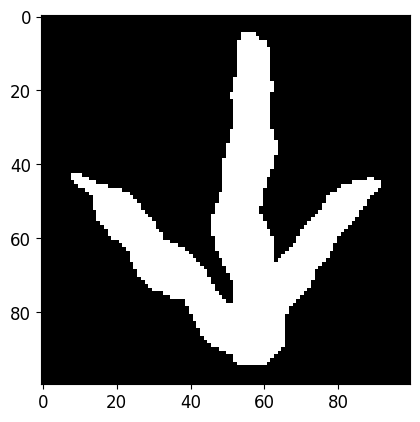

In [ ]:
# Test that the label and image match. We're using np.random instead of our
# rnd_gen since we don't want the runs of this snippet to vary the results in
# other snippets :) Run this as many times as you want!
test = np.random.randint(0,len(bal_X))
plt.imshow(bal_X[test], cmap='Greys')
print(f'The image should be of a(n) {bal_y[test]}')

In [ ]:
import numpy as np
import tensorflow as tf

# Assuming bal_X is a list of TensorFlow EagerTensors
# Convert each EagerTensor to a NumPy array and then flatten
bal_X = [tf.reshape(image, [-1]).numpy() for image in bal_X]

In [ ]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# set % of data to be used for testing
test_size=.10

# and split the dataset accordingly
X_train, X_test, y_train, y_test = train_test_split(
    bal_X, # the source of X data
    bal_y, # the source of y data
    test_size = test_size, # the percent of data to retain as a test
    random_state = rnd_seed ) # set the random seed - consistent runs are important!

In [ ]:
# Begin by importing the KNeighersClassifier and GridSearchCV from scikit.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Fill in the blanks in the code below
param_grid = {'weights':['uniform', 'distance'], # 1st hyperparameter and the values it can take
              'n_neighbors':list(range(1, 10)) # 2nd hyperparameter and the values it can take
              }

In [ ]:
# Instantiate the imported model class
knn_clf = KNeighborsClassifier()

In [ ]:
# We define a grid search using the knn_clf model and param grid. We will set
# the number of folds for the cross-validation to 6, and use the most verbose
# setting to get the best idea of how well each cv run performs.


# Let's instantiate the scikit class used to do grid searches
grid_search = GridSearchCV(
    knn_clf, # The model we're going to use in the search
    param_grid, # The method dictionary of parameters we'll iterate through in the search
    cv = 6, # The number of folds used to cross-validate
    verbose = 3) #Let's set the verbosity to the highest level: 3

In [ ]:
# import numpy as np
# import tensorflow as tf

# # Assuming bal_X is a list of TensorFlow EagerTensors
# # Convert each EagerTensor to a NumPy array and then flatten
# bal_X_flat = [tf.reshape(image, [-1]).numpy() for image in bal_X]

# # Convert the list of flattened arrays to a 2D NumPy array
# X_train_flat = np.stack(bal_X_flat, axis=0)

In [ ]:
# Complete the code
grid_search.fit(X_train,y_train)

Fitting 6 folds for each of 18 candidates, totalling 108 fits
[CV 1/6] END ....n_neighbors=1, weights=uniform;, score=0.732 total time=   0.2s
[CV 2/6] END ....n_neighbors=1, weights=uniform;, score=0.770 total time=   0.2s
[CV 3/6] END ....n_neighbors=1, weights=uniform;, score=0.808 total time=   0.3s
[CV 4/6] END ....n_neighbors=1, weights=uniform;, score=0.786 total time=   0.4s
[CV 5/6] END ....n_neighbors=1, weights=uniform;, score=0.758 total time=   0.4s
[CV 6/6] END ....n_neighbors=1, weights=uniform;, score=0.758 total time=   0.4s
[CV 1/6] END ...n_neighbors=1, weights=distance;, score=0.732 total time=   0.4s
[CV 2/6] END ...n_neighbors=1, weights=distance;, score=0.770 total time=   0.4s
[CV 3/6] END ...n_neighbors=1, weights=distance;, score=0.808 total time=   0.4s
[CV 4/6] END ...n_neighbors=1, weights=distance;, score=0.786 total time=   0.5s
[CV 5/6] END ...n_neighbors=1, weights=distance;, score=0.758 total time=   0.4s
[CV 6/6] END ...n_neighbors=1, weights=distance

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
#Store the best parameters and best scores for the models
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# And print them out. Try to make them nice!
print(f'best_parameters {best_parameters}',
      f'best_score {best_score}',
      sep='\n')

best_parameters {'n_neighbors': 4, 'weights': 'distance'}
best_score 0.7741998438719749


In [ ]:
#Import the accuracy metric
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [ ]:
#generate predictions from the best model
y_pred = grid_search.predict(X_test)

In [ ]:
#calculate the accuracy score, f1 and recall using the imported metric
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
# And print out the accuracy of the model
print(f'The accuracy of the model is {accuracy:.1%}')
print(f'The F1 of the model is {f1:.1%}')
print(f'The recall of the model is {recall:.1%}')

The accuracy of the model is 82.0%
The F1 of the model is 83.1%
The recall of the model is 83.1%


In [ ]:
# We will import shift form the scipy multi-dimensional image processing tools
from scipy.ndimage.interpolation import shift

<ipython-input-111-a3102eaee97c>:2: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [ ]:
# Using shift, we will write a function that shifts a single image left or right
def shift_image(image, dx, dy):
    image = image.reshape((100, 100))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)


In [ ]:
# Let's choose a random image from out training dataset
rnd_id = rnd_gen.integers(0,
                          X_train.shape[0]) # dataset we're sampling

# And load the image associated with rnd_id from the dataset
image = X_train[rnd_id]

# Now, let's grab the same image as below and shift it down 5 pixels
shifted_image_down = shift_image(image,
                                 0, # dx
                                 5) # dy

# and shift the original image left five pixels
shifted_image_left = shift_image(image,
                                 -5, # dx
                                 0) # dy

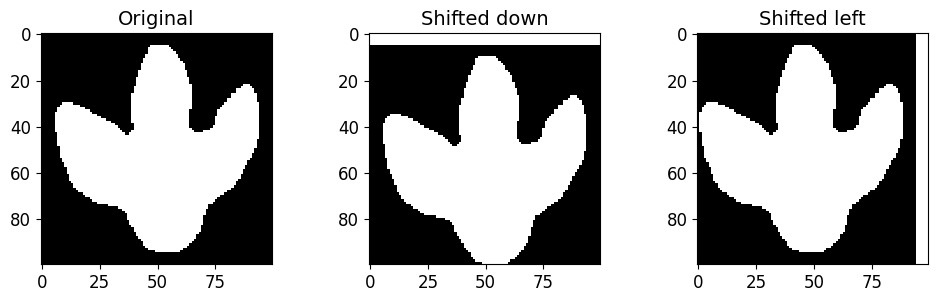

In [ ]:
#@title Run this cell to plot the images we made in the cell above. You can always doubleclick it if you want to look at the source code 😀
# And then create a matplotlib figure where we'll plot the image
fig, axes = plt.subplots(1, # one row
                         3, # three columns
                         figsize=(12,3))

# Plot the original
axes[0].set_title("Original", fontsize=14)
axes[0].imshow(image.reshape(100, 100), # turn the flattened data back into a 28x28 image
          interpolation="nearest",
          cmap="Greys");

# Plot the down-shifted
axes[1].set_title("Shifted down", fontsize=14)
axes[1].imshow(shifted_image_down.reshape(100,100),
          interpolation="nearest",
          cmap="Greys");

# Plot the left-shifted
axes[2].set_title("Shifted left", fontsize=14)
axes[2].imshow(shifted_image_left.reshape(100, 100),
          interpolation="nearest",
          cmap="Greys");

In [ ]:
# transform the datasets into lists of images. This will make it easy to
# iterate & append the shifted images
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

print(f'We have {len(X_train_augmented)} samples originally')

We have 1094 samples originally


In [ ]:
# Make a tuple of shifts to apply to the datasets as augmentation.
# a shift of 1 pixel right and 1 up is recommended for the first shift tuple,
# and a shift of 1 pixel left, and 1 pixel down are recommended for the second tuple.
shifts = ((1,-1),
          (-1,1))

In [ ]:
# Let's iterate through our shifts. Remember that each shift includes a value
# for dx and dy
for dx, dy in shifts:

    # For each shift defined, we'll iterate through the dataset to shift each
    # image
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [ ]:
# Transform the lists back into numpy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
#Let's print out the number of samples we have after augmenting!
print(f'We have {len(X_train_augmented)} samples after augmenting')

We have 3282 samples after augmenting


In [ ]:
#@title Run this cell to shuffle the augmented data...

# Generate scrambled indices list
aug_shuffler = rnd_gen.permutation(len(X_train_augmented))

# Shuffle the array using the scrambled indices - that way the input data order
# matches the target data order
X_train_augmented = X_train_augmented[aug_shuffler]
y_train_augmented = y_train_augmented[aug_shuffler]

In [ ]:
#Complete the code
knn_clf = KNeighborsClassifier( # The model class we're instantiating
    n_neighbors = best_parameters['n_neighbors'], # Load in our best number of neighbors
    weights = best_parameters['weights']) # Load in our best weight type

In [ ]:
knn_clf.fit(X_train_augmented, # The input we're fitting
            y_train_augmented) # The labels we're fitting

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
# Let's get the predictions from our model
y_pred = knn_clf.predict(X_test)

# And use them to calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# We'll finish by printing out our accuracy...
print(f'The accuracy for our model training on augmented data is {accuracy:.1%}!')

The accuracy for our model training on augmented data is 82.8%!


Accuracy: 0.8278688524590164
F1 Score: 0.8372093023255814
Recall: 0.8307692307692308


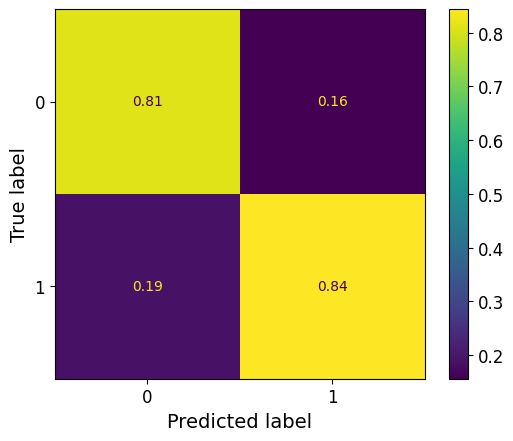

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,f1_score,recall_score
cm = confusion_matrix(y_test,y_pred, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate and print the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)